# Simple version of `probabilistic_arithmetic.ipynb` that uses Uniform random variables
Let $\varphi = (X > 0) \land (Y > 0)$. The robustness of this formula is:
$$\rho^\varphi ([X,Y], t) = \min \{ X, Y\}.$$
The bounds on the CDF of $\rho$ as a random variable should come from three possible conditions for correlation: no correlation (exchangeable), full correlation, and anti-correlation. Full correlation provides a slope of $1$ for the CDF, no correlation provides a quadratic flipped ($\sqrt{}$), and anti-correlation provides a slope of $2$. If we apply the CDF algorith, we should see numeric bounds that overapproximate these cases. Specifically, the CDF is of the form
$$ y = \begin{cases}
    0 & mx \leq 0 \\
    mx & mx \leq 1\\
    1 & mx > 1
\end{cases}$$
where $m \in [1, 2]$. Note that the true CDF is only linear for the correlated and anti-correlated cases. Anything in between is a left-invertible curve. (Scheizer, 1983: left-invertible. Chung, 2001: right-invertible.)

In [1]:
import scipy.stats
import numpy as np 
import interval
from stlpy_copulas.STL import LinearPredicate
from stlpy_copulas.STL import STLRandomVariable
from matplotlib import pyplot as plt
# from matplotlib import rc


plt.rcParams['text.usetex'] = True

In [2]:
N_BINS = 400 # Samples

RVs = scipy.stats.norm(0, 1)
# RVs = scipy.stats.uniform(-1,1)

X = STLRandomVariable(RVs, debug=True)
Y = STLRandomVariable(RVs, debug=True)
Z = STLRandomVariable(RVs, debug=True)

X.compute_inverse_cdf_from_cdf(N_BINS, np.interval(-7, 7))
Y.compute_inverse_cdf_from_cdf(N_BINS, np.interval(-7, 7))
Z.compute_inverse_cdf_from_cdf(N_BINS, np.interval(-7, 7))

### Testing
Examine the $x$ vs $y$ plot of the random variable `X`.

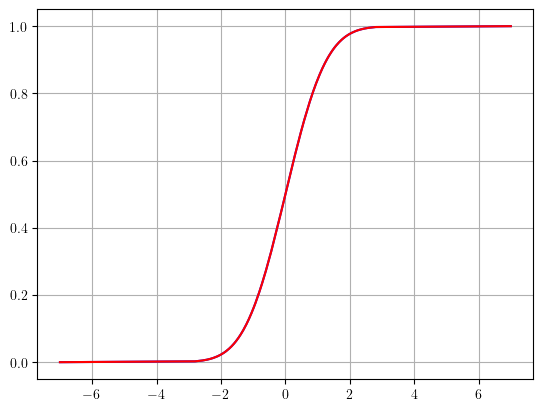

In [3]:
plt.figure()
x_, _x = interval.get_lu(X.xs)
y = X.ys
plt.plot(x_, y, 'b')
plt.plot(_x, y, 'r')
plt.grid(True)
plt.show()

### STL Formula
Create the STL formula for testing.

In [4]:
geq_1 = LinearPredicate(np.array([1]), np.array([0]), random=True)
leq_1 = LinearPredicate(np.array([-1]), np.array([1]), random=True)
hrz = 3
phi = geq_1.always(0, hrz-1) #& leq_1.eventually(0, hrz-1)
print(phi)
rho = phi.robustness([X, Y, Z], 0, random=True)

and
├── { Predicate [[1]]*y >= [0] }
├── { Predicate [[1]]*y >= [0] }
└── { Predicate [[1]]*y >= [0] }



### Evaluation
Perform several tests on the random variable $\rho$:
- Sample the random variable twice with replacement to form exchangeable samples for `X` and `Y`. Evaluate robustness to form an ECDF for $\rho$.
- Extract the CDF represented by the random variable $\rho$, in the upper and lower bounds.
- Plot the results.

In [5]:
N_SAMPLES = N_BINS * 10

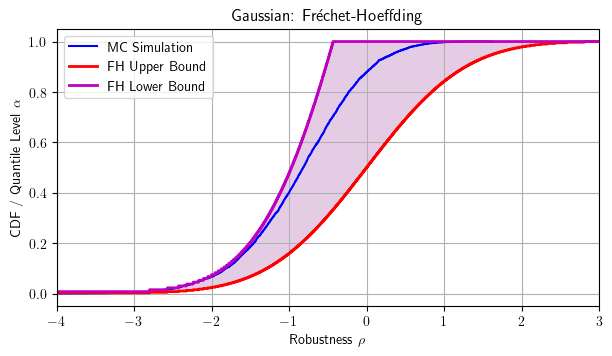

In [6]:
plt.figure(figsize=(7,3.6))
ax = plt.gca()
ecdf_samples = 1
for i in range(ecdf_samples):
    samples = np.zeros((hrz, N_SAMPLES))
    robustness = np.zeros(N_SAMPLES)
    for j in range(N_SAMPLES):
        samples[:, j] = RVs.rvs(size=hrz)

        # samples[0, j:j+1] = uniform_RV.rvs(size=1)
        # samples[1, j] = 0 - samples[0, j] #samples[0,j]
        # samples[2, j] = 0 - samples[0, j]

        robustness[j] = phi.robustness(samples[:, j:j+1].T, 0)
    
    ec = scipy.stats.ecdf(robustness)
    ec.cdf.plot(ax, linewidth=1.5, color='blue' )

# Now, compute it from the results.
rho.cdf_from_inverse()
xrange = np.linspace(-4, 3, N_SAMPLES)
# xrange = np.linspace(-2, 1, N)
ys = np.zeros_like(xrange, dtype=np.interval)
for j in range(N_SAMPLES):
    ys[j] = rho.cdf_numeric(xrange[j]) # TODO: vmap cdf_numeric

y_, _y = interval.get_lu(ys)

plt.plot(xrange, y_, 'r', linewidth=2)
plt.plot(xrange, _y, 'm', linewidth=2)
plt.fill_between(xrange, y_, _y, alpha=0.2, color='purple')
plt.xlim([-4, 3])
plt.ylim([-0.05, 1.05])
plt.xlabel('Robustness $\\rho$')
plt.title('Gaussian: Fréchet-Hoeffding')
plt.ylabel('CDF / Quantile Level $\\alpha$')
plt.legend(['MC Simulation', 'FH Upper Bound', 'FH Lower Bound'])
plt.grid()
plt.savefig('output/gaussian_example.pdf')
plt.show()

In [7]:
# Test rho to see if it has np.inf in there.
for j in range(rho.xs.shape[0]):
    print(f'{rho.xs[j]=}')
print(f'{rho.ys=}')
# for j in range(N):
#     print

rho.xs[j]=([-inf, -7])
rho.xs[j]=([-inf, -2.806])
rho.xs[j]=([-7, -2.574])
rho.xs[j]=([-2.806, -2.431])
rho.xs[j]=([-2.806, -2.325])
rho.xs[j]=([-2.806, -2.24])
rho.xs[j]=([-2.575, -2.168])
rho.xs[j]=([-2.575, -2.107])
rho.xs[j]=([-2.575, -2.052])
rho.xs[j]=([-2.431, -2.003])
rho.xs[j]=([-2.431, -1.958])
rho.xs[j]=([-2.431, -1.917])
rho.xs[j]=([-2.325, -1.879])
rho.xs[j]=([-2.325, -1.844])
rho.xs[j]=([-2.325, -1.81])
rho.xs[j]=([-2.24, -1.779])
rho.xs[j]=([-2.24, -1.749])
rho.xs[j]=([-2.24, -1.721])
rho.xs[j]=([-2.169, -1.694])
rho.xs[j]=([-2.169, -1.668])
rho.xs[j]=([-2.169, -1.643])
rho.xs[j]=([-2.107, -1.619])
rho.xs[j]=([-2.107, -1.597])
rho.xs[j]=([-2.107, -1.574])
rho.xs[j]=([-2.053, -1.553])
rho.xs[j]=([-2.053, -1.532])
rho.xs[j]=([-2.053, -1.512])
rho.xs[j]=([-2.003, -1.493])
rho.xs[j]=([-2.003, -1.474])
rho.xs[j]=([-2.003, -1.456])
rho.xs[j]=([-1.959, -1.438])
rho.xs[j]=([-1.959, -1.42])
rho.xs[j]=([-1.959, -1.403])
rho.xs[j]=([-1.918, -1.387])
rho.xs[j]=([-1.918, -1.37])
rho.